# Analyzing data from the National Buoy System

## Background

The National Data Buoys Data center publish oceanographic data from their buoys on their web. Bouys send up their measurements every hour and the data is published as a spreadsheet in the NOAA web site.

We want to collect the data for any, or many, bouys, clean it up, and analyze it to make a plot.

## Challenges

- Get the data from the web and read it into our Python notebook.
- Clean up the data, which sometimes has missing measurements.
- Choose the bouys we want to analyze using their ID numbers.
- Run our analysis (we will just make a plot).
- Save our code as a script or module for reusing it later.

## References 

- National Data Buoy Center: http://www.ndbc.noaa.gov/
- Data for Station 44255 - NE Burgeo Bank: http://www.ndbc.noaa.gov/station_realtime.php?station=44255
- How a buoy get an ID: http://www.ndbc.noaa.gov/staid.shtml
- All the station IDs: http://www.ndbc.noaa.gov/to_station.shtml

In [1]:
url = 'http://www.ndbc.noaa.gov/data/realtime2/44255.txt'

In [8]:
import requests

In [12]:
response = requests.get(url)

print response.text[:500]

#YY  MM DD hh mm WDIR WSPD GST  WVHT   DPD   APD MWD   PRES  ATMP  WTMP  DEWP  VIS PTDY  TIDE
#yr  mo dy hr mn degT m/s  m/s     m   sec   sec degT   hPa  degC  degC  degC  nmi  hPa    ft
2015 08 28 19 00 260  9.0 11.0   1.8     6    MM  MM 1010.2    MM  17.7    MM   MM +0.1    MM
2015 08 28 18 00 260  8.0  9.0   1.7     5    MM  MM 1010.3    MM  17.7    MM   MM +0.2    MM
2015 08 28 17 00 270  8.0 10.0   1.6     6    MM  MM 1010.3    MM  17.8    MM   MM +0.4    MM
2015 08 28 16 00 270  9.0 11.0


In [14]:
type(response.text)

unicode

In [29]:
import StringIO
data_as_string = StringIO.StringIO(response.text)

In [30]:
print data_as_string

<StringIO.StringIO instance at 0xacbeec6c>


In [31]:
import pandas as pd
#shortcut

In [38]:
data = pd.read_csv(StringIO.StringIO(response.text), 
                   delim_whitespace=True, 
                   skiprows=[1,2], 
                   usecols=[0,1,2,3,6,12], 
                   parse_dates=[[0,1,2,3]])

print data

            #YY_MM_DD_hh  WSPD    PRES
0    2015-08-28 18:00:00     8  1010.3
1    2015-08-28 17:00:00     8  1010.3
2    2015-08-28 16:00:00     9  1010.1
3    2015-08-28 15:00:00     7  1010.1
4    2015-08-28 14:00:00     5  1009.9
5    2015-08-28 13:00:00     7  1009.3
6    2015-08-28 12:00:00     6  1009.1
7    2015-08-28 11:00:00     5  1008.7
8    2015-08-28 10:00:00     5  1008.8
9    2015-08-28 09:00:00     7  1008.4
10   2015-08-28 08:00:00     9  1008.3
11   2015-08-28 07:00:00    11  1008.9
12   2015-08-28 06:00:00     8  1010.2
13   2015-08-28 05:00:00    10  1011.8
14   2015-08-28 04:00:00     9  1013.8
15   2015-08-28 03:00:00    10  1014.2
16   2015-08-28 02:00:00    11  1014.5
17   2015-08-28 01:00:00     8  1016.3
18   2015-08-28 00:00:00     8  1016.9
19   2015-08-27 23:00:00     7  1017.1
20   2015-08-27 22:00:00     8  1017.0
21   2015-08-27 21:00:00     7  1017.4
22   2015-08-27 20:00:00     8  1017.9
23   2015-08-27 19:00:00     6  1018.4
24   2015-08-27 18:00:00 

In [48]:
from numpy import nan
data = data.replace('MM',nan)       #replacing missing measurments with nan
data = data.dropna(axis=0)          #finds a row with a nan, delete it
data = data.convert_objects(convert_numeric=True)

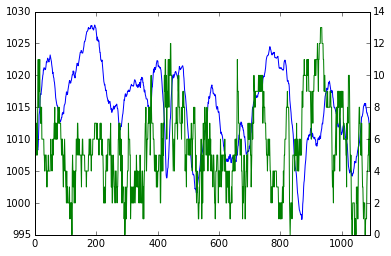

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
data.PRES.plot()                              #grab column from name of column
data.WSPD.plot(secondary_y=True, style='g')   #plot second data set on graph